# 1장-3절. 상관분석
- 두 변수 간 관계의 정도를 알아보기 위한 분석방법
- 상관계수는 데이터 간 상관관계가 얼마나 강한지를 수치화한 값으로 두 변수 간 관련성의 정도를 의미
- 종류
    - 피어슨 상관계수
    - 스피어만 상관계수
    - 켄달의 순위 상관계수

- 상관계수 해석

<img src="https://user-images.githubusercontent.com/80219821/131305314-14fe274a-7e45-4dcd-84df-6a1c069443ed.png" height="300px" width="600px" align="left">

## 공분산?
- 두 확률변수가 함께 변화하는지의 정도를 측정하는 값
- 양의 상관관계가 존재할 시 양수값을 가지고 반대로 음의 상관관계가 존재할 시 음수 값을 가진다.
- 공분산을 통해 상관성의 경향을 파악할 수는 있지만, 두 변수의 측정 단위 크기에 따라 음의 무한대에서 양의 무한대 사이에 존재하게 됨으로 상관성의 정도 파악에는 한계가 있음.
- 따라서 공분산을 두 변수의 표준편차 곱으로 나누어 표준화 시킨 상관계수를 이요해 두 변수간 상관성의 정도를 파악하는 것

---
---

### 공분산 확인

In [12]:
# 데이터 불러오기

import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic = titanic.iloc[:,0:7]
titanic.dropna(axis=0, inplace = True)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare
885,0,3,female,39.0,0,5,29.125
886,0,2,male,27.0,0,0,13.000
887,1,1,female,19.0,0,0,30.000
889,1,1,male,26.0,0,0,30.000
890,0,3,male,32.0,0,0,7.750


In [34]:
# 공분산
import numpy as np 

print('\n* 공분산')
print('')
print(np.cov(titanic.survived, titanic.pclass))
print(np.cov(titanic.survived, titanic.age))

titanic.cov()


* 공분산

[[ 0.2415328  -0.14816474]
 [-0.14816474  0.70266283]]
[[  0.2415328   -0.5512961 ]
 [ -0.5512961  211.01912475]]


,survived,pclass,age,sibsp,parch,fare
survived,0.241533,-0.148165,-0.551296,-0.007932,0.039133,6.974923
pclass,-0.148165,0.702663,-4.496004,0.052412,0.018370,-24.583138
age,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
sibsp,-0.007932,0.052412,-4.163334,0.864497,0.304513,6.806212
parch,0.039133,0.018370,-2.344191,0.304513,0.728103,9.262176
fare,6.974923,-24.583138,73.849030,6.806212,9.262176,2800.413100


=> 사실, survived와 pclass도 상관성이 있지만, 값의 크기가 차이나기 때문에 훨씬 낮은 공분산을 가진다.

---

### 상관계수 확인(피어슨, 스피어만, 켄달)

In [14]:
titanic.corr(method='pearson')

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


In [17]:
titanic.corr(method='spearman')

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.360656,-0.052565,0.073244,0.156444,0.339027
pclass,-0.360656,1.000000,-0.361666,-0.050959,-0.018489,-0.730578
age,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
sibsp,0.073244,-0.050959,-0.182061,1.000000,0.426955,0.422994
parch,0.156444,-0.018489,-0.254212,0.426955,1.000000,0.407150
fare,0.339027,-0.730578,0.135051,0.422994,0.407150,1.000000


In [18]:
titanic.corr(method='kendall')

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.342105,-0.043385,0.070775,0.150952,0.278785
pclass,-0.342105,1.000000,-0.286081,-0.046724,-0.016988,-0.611963
age,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249
sibsp,0.070775,-0.046724,-0.142746,1.000000,0.401108,0.336681
parch,0.150952,-0.016988,-0.200112,0.401108,1.000000,0.326439
fare,0.278785,-0.611963,0.093249,0.336681,0.326439,1.000000


- 시각화

<Figure size 1008x576 with 0 Axes>

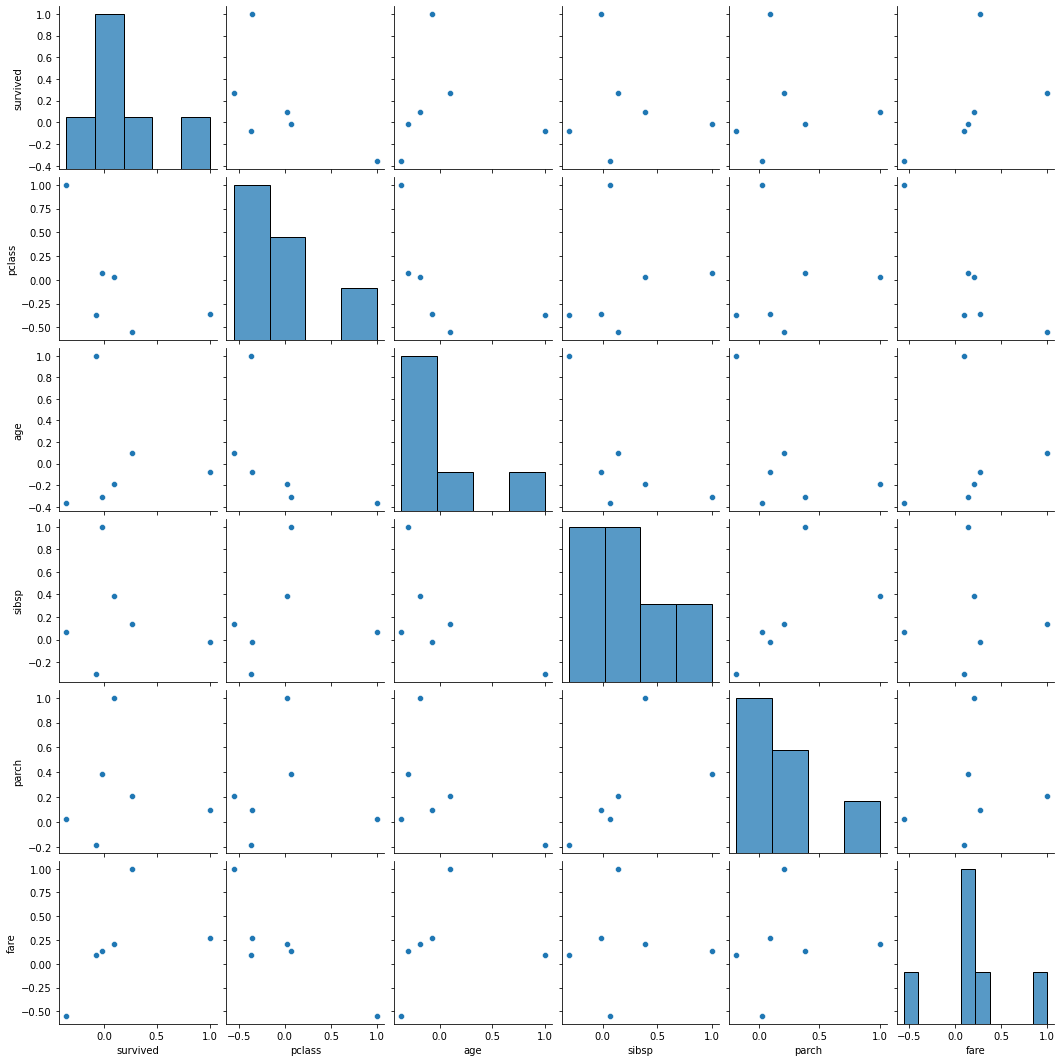

In [42]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.pairplot(data = titanic.corr())
plt.show()

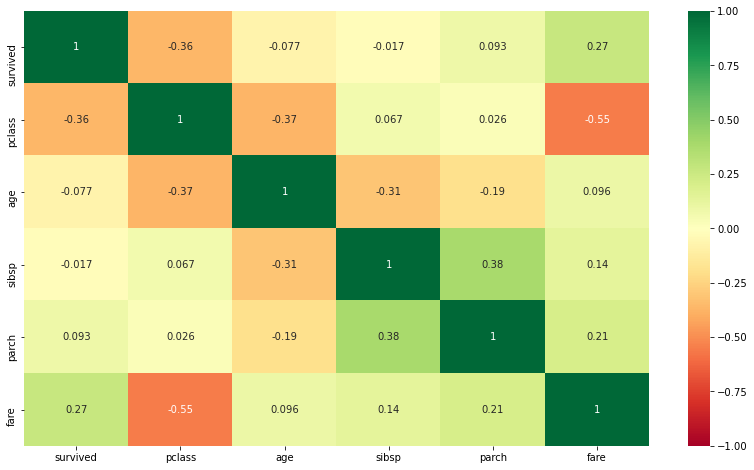

In [36]:
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.heatmap(titanic.corr(method='pearson'),
           annot = True, #실제 값 화면에 나타내기
           cmap='RdYlGn', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.show()

---

### survived와 pclass의 상관분석하고 검정결과 해석
- 가설
    - 귀무가설 : 변수1과 변수2 간에는 상관관계가 없다. (상관계수=0)
    - 대립가설 : 변수1과 변수2 간에는 상관관계가 있다. (상관계수!=0)

In [26]:
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(titanic.survived, titanic.pclass)
corr #(상관계수, p-value)

(-0.35965268208684575, 3.1621035416647744e-23)

In [9]:
# 스피어만 상관계수 검정
rho = stats.spearmanr(titanic.survived, titanic.pclass)
rho

SpearmanrResult(correlation=-0.36065641974949025, pvalue=2.346106779238448e-23)

In [10]:
# 캔달 상관계수 검정
tau = stats.kendalltau(titanic.survived, titanic.pclass)
tau

KendalltauResult(correlation=-0.3421051759132117, pvalue=5.957314337487773e-22)

=> -0.35정도로 약한 음의 상관관계가 있다고 볼 수 있다.

=> 세 결과 모두 p-value가 0.05보다 작음으로 귀무가설을 기각한다.즉, survived와 pclass 변수 간에는 상관관계가 있다.